## STEP 1 : DEFINING THE PROBLEM STATEMENT

#### Company Background:
X Education, an online education company, sells courses to industry professionals. They receive website traffic from various marketing channels, including search engines like Google. Interested visitors may browse courses, fill out forms, or watch videos. When visitors provide contact information, they become leads. Additionally, the company acquires leads through past referrals. The sales team then attempts to convert these leads through calls and emails.

#### Current Challenge:
Despite acquiring many leads, X Education's lead conversion rate is only about 30%. For instance, out of 100 daily leads, only 30 convert. To improve efficiency, the company wants to identify "Hot Leads"—those with the highest potential to convert. Focusing on these leads should boost the conversion rate.

#### Data Provided:
The dataset contains approximately 9,000 leads with various attributes (e.g., Lead Source, Total Time Spent on Website, Total Visits, Last Activity). The target variable is 'Converted,' indicating whether a lead was converted (1) or not (0). Some categorical variables contain a level 'Select,' which should be treated as a null value.

### Goals of the Case Study:

#### Build a Logistic Regression Model:

1. Assign a lead score (0 to 100) to each lead.
2. A higher score indicates a higher likelihood of conversion (hot lead), while a lower score indicates a lower likelihood (cold lead).

#### Future Adjustments:

* The model should be adaptable to address additional company requirements as specified in a separate document. These adjustments should be included in the final presentation with recommendations.

### Objective:
The primary objective is to enhance the lead conversion process by accurately identifying potential leads, thereby enabling the sales team to focus their efforts on high-potential leads and improve the overall conversion rate.

## STEP 2 : DATA LOADING & PREPARATION

In [1]:
import warnings                  # For handling warnings in the code
warnings.filterwarnings("ignore")  # Suppress all warnings

import numpy as np               # For numerical operations and handling arrays
import pandas as pd              # For data manipulation and analysis
import seaborn as sns            # For statistical data visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations

In [2]:
pd.set_option('display.max_columns', 100) #To view all the columns in the dataset (upto 150 columns)
pd.set_option('display.max_rows', None) #To view the complete data without truncation when working with large datasets

# Loading the dataset
lead_score = pd.read_csv('Leads.csv')
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Total no. of rows & columns in the dataset
lead_score.shape

(9240, 37)

In [4]:
# Checking the summary of the dataset
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Basic information about the dataset
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Check for duplicates in the Prospect ID & Lead Number column
column1_duplicates = lead_score['Prospect ID'].duplicated().any()
print(column1_duplicates)
column2_duplicates = lead_score['Lead Number'].duplicated().any()
print(column2_duplicates)

False
False


As there are no duplicate entries, we can delete the 'Prospect ID' & 'Lead Number' as these columns serve as unique identifiers for records and do not provide meaningful insights or patterns in the data.

In [7]:
lead_score = lead_score.drop(columns=['Prospect ID', 'Lead Number'])
lead_score.shape

(9240, 35)

In [8]:
# Checking for the null values
lead_score.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
I agree to pay the amount through cheque            0
A free copy of Mastering The

#### Drop all the columns which are having more than 4000 null values

In [9]:
for col in lead_score.columns:
    if lead_score[col].isnull().sum() > 4000:
        lead_score.drop(columns=col, inplace = True)

In [10]:
lead_score.shape

(9240, 30)

As the X Education Company is providing online courses, the 'City' & 'Country' won't be of any use in the analysis. We can drop these columns

In [11]:
lead_score.drop(columns=['City', 'Country'], inplace = True)
lead_score.shape

(9240, 28)

In [12]:
# Calculation of percentage of missing values
(lead_score.isnull().sum().sort_values(ascending=False) / lead_score.shape[0]) * 100

Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
How did you hear about X Education               23.885281
Specialization                                   15.562771
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

In [13]:
# Checking for the value_counts() in each of the column

for col in lead_score.columns:
    print(f"Value Count for column : {col}")
    print(lead_score[col].value_counts())
    print("\n" + "-"*40 + "\n")

Value Count for column : Lead Origin
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

----------------------------------------

Value Count for column : Lead Source
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

----------------------------------------

Value Count for column : Do Not Email
Do Not Email
No     

In [14]:
lead_score['Tags'].isnull().sum()

3353

In [15]:
# Impute missing values in Tags column with 'Unknown'
lead_score['Tags'].fillna('Unknown', inplace=True)
lead_score['Tags'].isnull().sum()

0

In [16]:
# Removing the columns which are not having much variety of records (single value makes up more than 95% of the entries)
columns_to_drop = ['Do Not Call','What matters most to you in choosing a course', 'Search', 'Magazine', 
                   'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                   'Through Recommendations', 'Receive More Updates About Our Courses', 
                   'Update me on Supply Chain Content', 'Get updates on DM Content', 
                   'I agree to pay the amount through cheque']

lead_score.drop(columns=columns_to_drop, inplace=True)
lead_score.shape

(9240, 15)

In [17]:
lead_score.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Tags', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [18]:
# 'Lead Profile' & 'How did you hear about X Education' has more than 40% of the values as 'Select'
lead_score.drop(['Lead Profile', 'How did you hear about X Education'], axis=1, inplace=True)
lead_score.shape

(9240, 13)

In [19]:
# Calculation of percentage of missing values
(lead_score.isnull().sum().sort_values(ascending=False) / lead_score.shape[0]) * 100

What is your current occupation           29.112554
Specialization                            15.562771
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Lead Source                                0.389610
Lead Origin                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
Total Time Spent on Website                0.000000
Tags                                       0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [20]:
lead_score['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [21]:
lead_score['What is your current occupation'].isnull().sum()

2690

In [22]:
# Droppping the null rows in the Occupation column
lead_score = lead_score[~pd.isnull(lead_score['What is your current occupation'])]

# Calculation of percentage of missing values again
(lead_score.isnull().sum().sort_values(ascending=False) / lead_score.shape[0]) * 100

TotalVisits                               1.984733
Page Views Per Visit                      1.984733
Last Activity                             1.572519
Lead Source                               0.549618
Specialization                            0.274809
Lead Origin                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
Total Time Spent on Website               0.000000
What is your current occupation           0.000000
Tags                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [23]:
# Droppping the null rows in the TotalVisits column
lead_score = lead_score[~pd.isnull(lead_score['TotalVisits'])]

# Calculation of percentage of missing values again
(lead_score.isnull().sum().sort_values(ascending=False) / lead_score.shape[0]) * 100

Lead Source                               0.451713
Specialization                            0.280374
Lead Origin                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               0.000000
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.000000
Last Activity                             0.000000
What is your current occupation           0.000000
Tags                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [24]:
# Droppping the null rows in the Lead Source column
lead_score = lead_score[~pd.isnull(lead_score['Lead Source'])]

# Calculation of percentage of missing values again
(lead_score.isnull().sum().sort_values(ascending=False) / lead_score.shape[0]) * 100

Specialization                            0.281646
Lead Origin                               0.000000
Lead Source                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               0.000000
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.000000
Last Activity                             0.000000
What is your current occupation           0.000000
Tags                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [25]:
# Droppping the null rows in the Specialization column
lead_score = lead_score[~pd.isnull(lead_score['Specialization'])]

# Calculation of percentage of missing values again
(lead_score.isnull().sum().sort_values(ascending=False) / lead_score.shape[0]) * 100

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

#### The columns are having a value 'Select' which represents a default or placeholder option, indicating that the user did not provide a meaningful response. It's equivalent to a missing value because it doesn't convey any real information. To handle this, we need to treat 'Select' as a missing value and process it accordingly.

In [26]:
# Find columns where 'Select' is a value
select_columns = lead_score.columns[lead_score.isin(['Select']).any()]
print(f"Columns containing 'Select': {select_columns.tolist()}")

Columns containing 'Select': ['Specialization']


In [27]:
lead_score['Specialization'].value_counts()

Specialization
Select                               1838
Finance Management                    745
Human Resource Management             665
Marketing Management                  663
Operations Management                 391
Business Administration               310
IT Projects Management                278
Supply Chain Management               275
Banking, Investment And Insurance     266
Media and Advertising                 161
Travel and Tourism                    149
International Business                136
Healthcare Management                 122
Hospitality Management                 90
E-COMMERCE                             80
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: count, dtype: int64

In [28]:
# Replace 'Select' with 'Unknown'
lead_score.replace('Select', 'Unknown', inplace=True)
lead_score['Specialization'].value_counts()

Specialization
Unknown                              1838
Finance Management                    745
Human Resource Management             665
Marketing Management                  663
Operations Management                 391
Business Administration               310
IT Projects Management                278
Supply Chain Management               275
Banking, Investment And Insurance     266
Media and Advertising                 161
Travel and Tourism                    149
International Business                136
Healthcare Management                 122
Hospitality Management                 90
E-COMMERCE                             80
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: count, dtype: int64

In [29]:
lead_score['Tags'].value_counts()

Tags
Will revert after reading the email                  2016
Ringing                                              1187
Unknown                                               707
Interested in other courses                           477
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Not doing further education                           145
Lost to EINS                                          123
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch 

#### Since we have imputed the 'Specialization' and 'Tags' columns with the value 'Unknown', these columns are no longer useful for analysis. Removing rows with 'Unknown' values could result in a significant loss of important data due to their high frequency. Therefore, we will address these 'Unknown' records after creating dummy variables.

#### Data Cleaning has been done

## STEP 3 : EXPLORATORY DATA ANALYSIS

In [30]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6373 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  Tags                                    6373 non-null   object 
 

In [31]:
# Segragation of columns into categorical and numerical for EDA

categorical_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 
                               'What is your current occupation', 'A free copy of Mastering The Interview', 
                               'Last Notable Activity', 'Tags']
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

target_cols = 'Converted'

### Univariate Analysis
To summarize and understand the distribution, central tendency, and spread of a single variable in a dataset.

#### Univariate Analysis of Numerical Columns

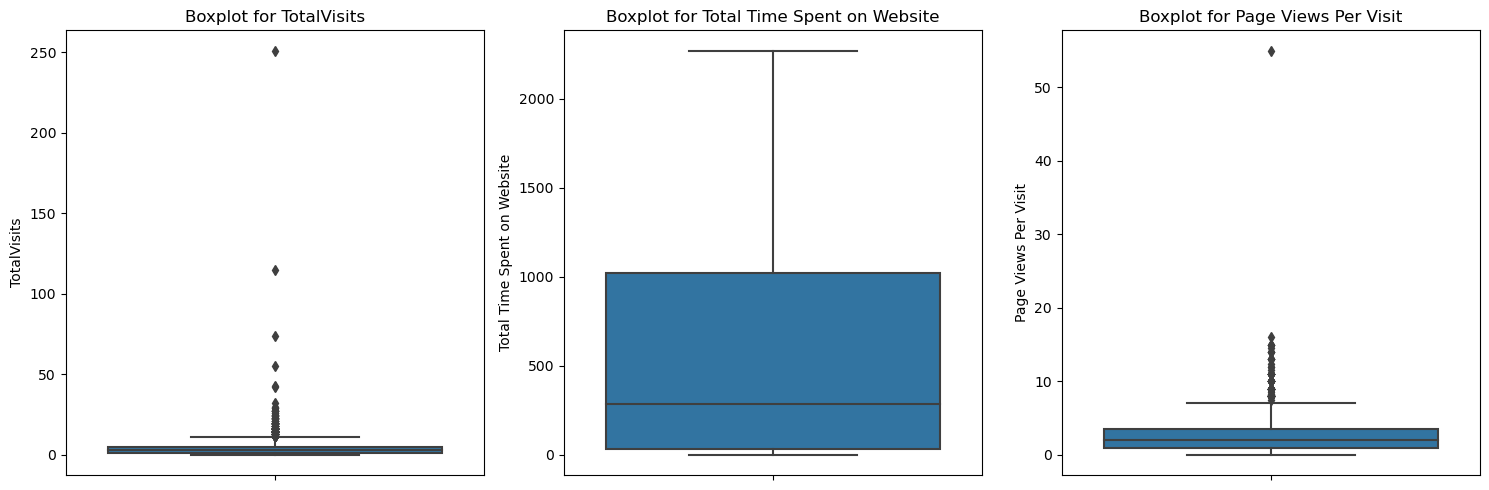

In [32]:
# Checking for outliers in the numerical columns
fig, plot = plt.subplots(1, len(numerical_cols), figsize=(15, 5))

# Looping through numerical columns to create boxplots
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=lead_score, y=col, ax=plot[i])
    plot[i].set_title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

#### 'TotalVisits' & 'Page Views Per Visit' is having a huge no. of outliers which can skew the analysis, hence we will handle the outliers using Interquartile Range (IQR) technique

In [33]:
outlier_cols = ['TotalVisits', 'Page Views Per Visit']

for values in outlier_cols:
    
    q1 = lead_score[values].describe()['25%']
    q3 = lead_score[values].describe()['75%']
    IQR = q3 - q1
    
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    
    lead_score[values] = np.where(lead_score[values] > upper_bound, upper_bound, lead_score[values])
    lead_score[values] = np.where(lead_score[values] < lower_bound, lower_bound, lead_score[values])

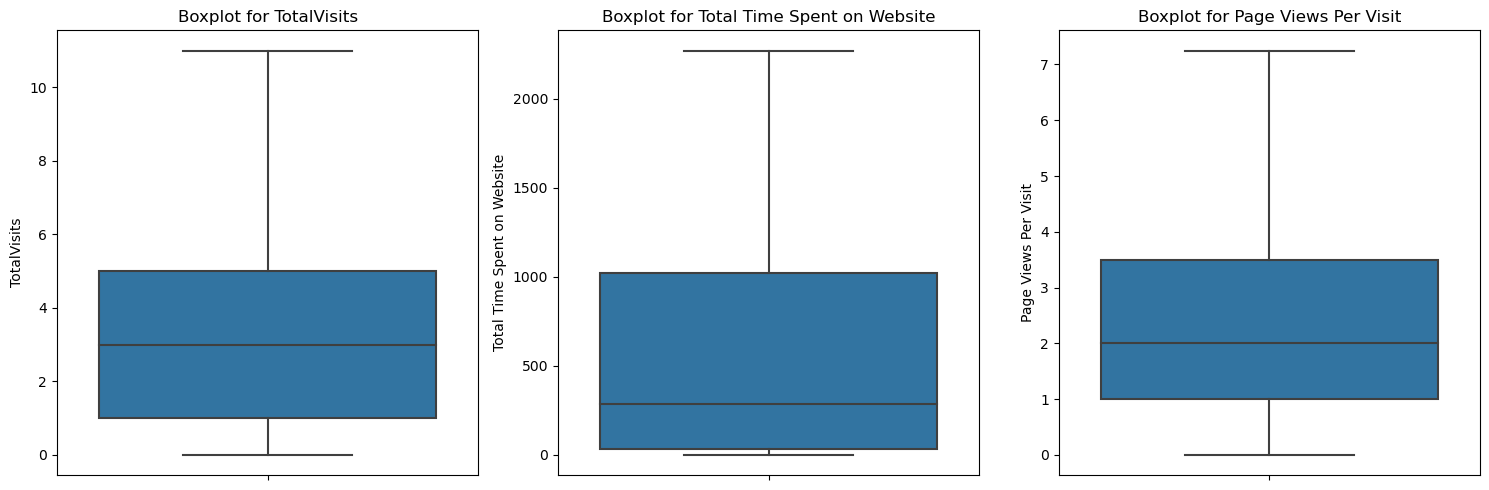

In [34]:
# Checking for outliers again in the numerical columns after imputation
fig, plot = plt.subplots(1, len(numerical_cols), figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=lead_score, y=col, ax=plot[i])
    plot[i].set_title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

Outliers has been handled in the numerical variables

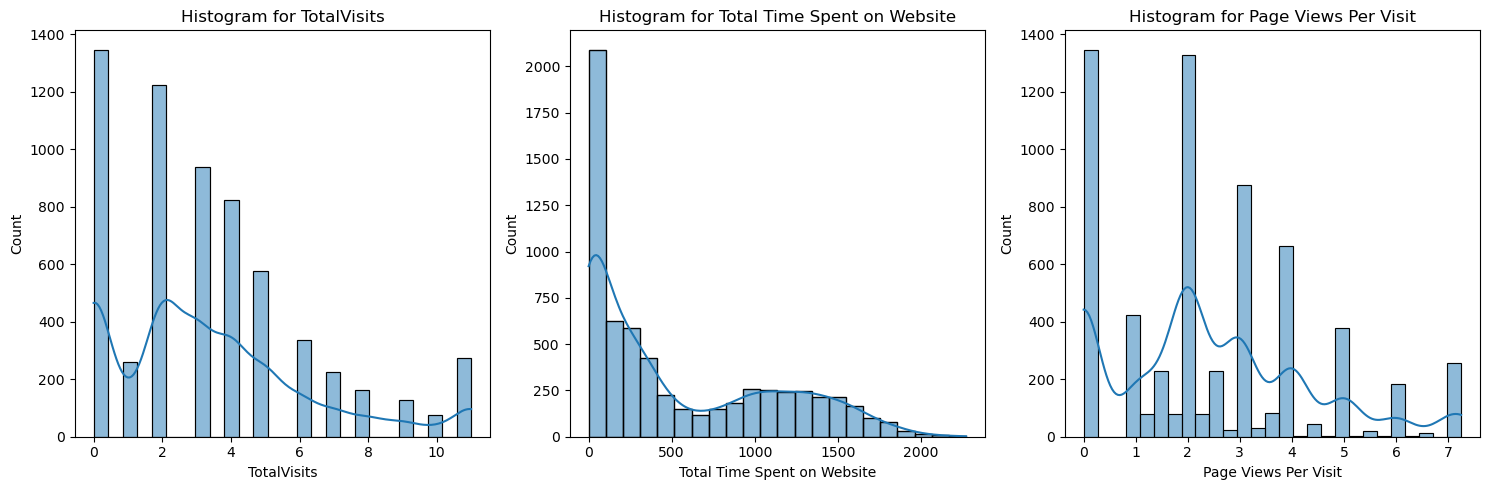

In [35]:
fig, plot = plt.subplots(1, 3, figsize=(15, 5))
i = 0

for col in numerical_cols:
    sns.histplot(data=lead_score, x=col, kde=True, ax=plot[i])
    plot[i].set_title(f'Histogram for {col}')
    i += 1

plt.tight_layout()
plt.show()

- Most leads are generated within the first three visits to the page.
- The majority of leads spend less than 100 minutes on the page (considering the data is provided in mins)
- There is no clear trend in page views per visit.

#### Univariate Analysis of Categorical Columns

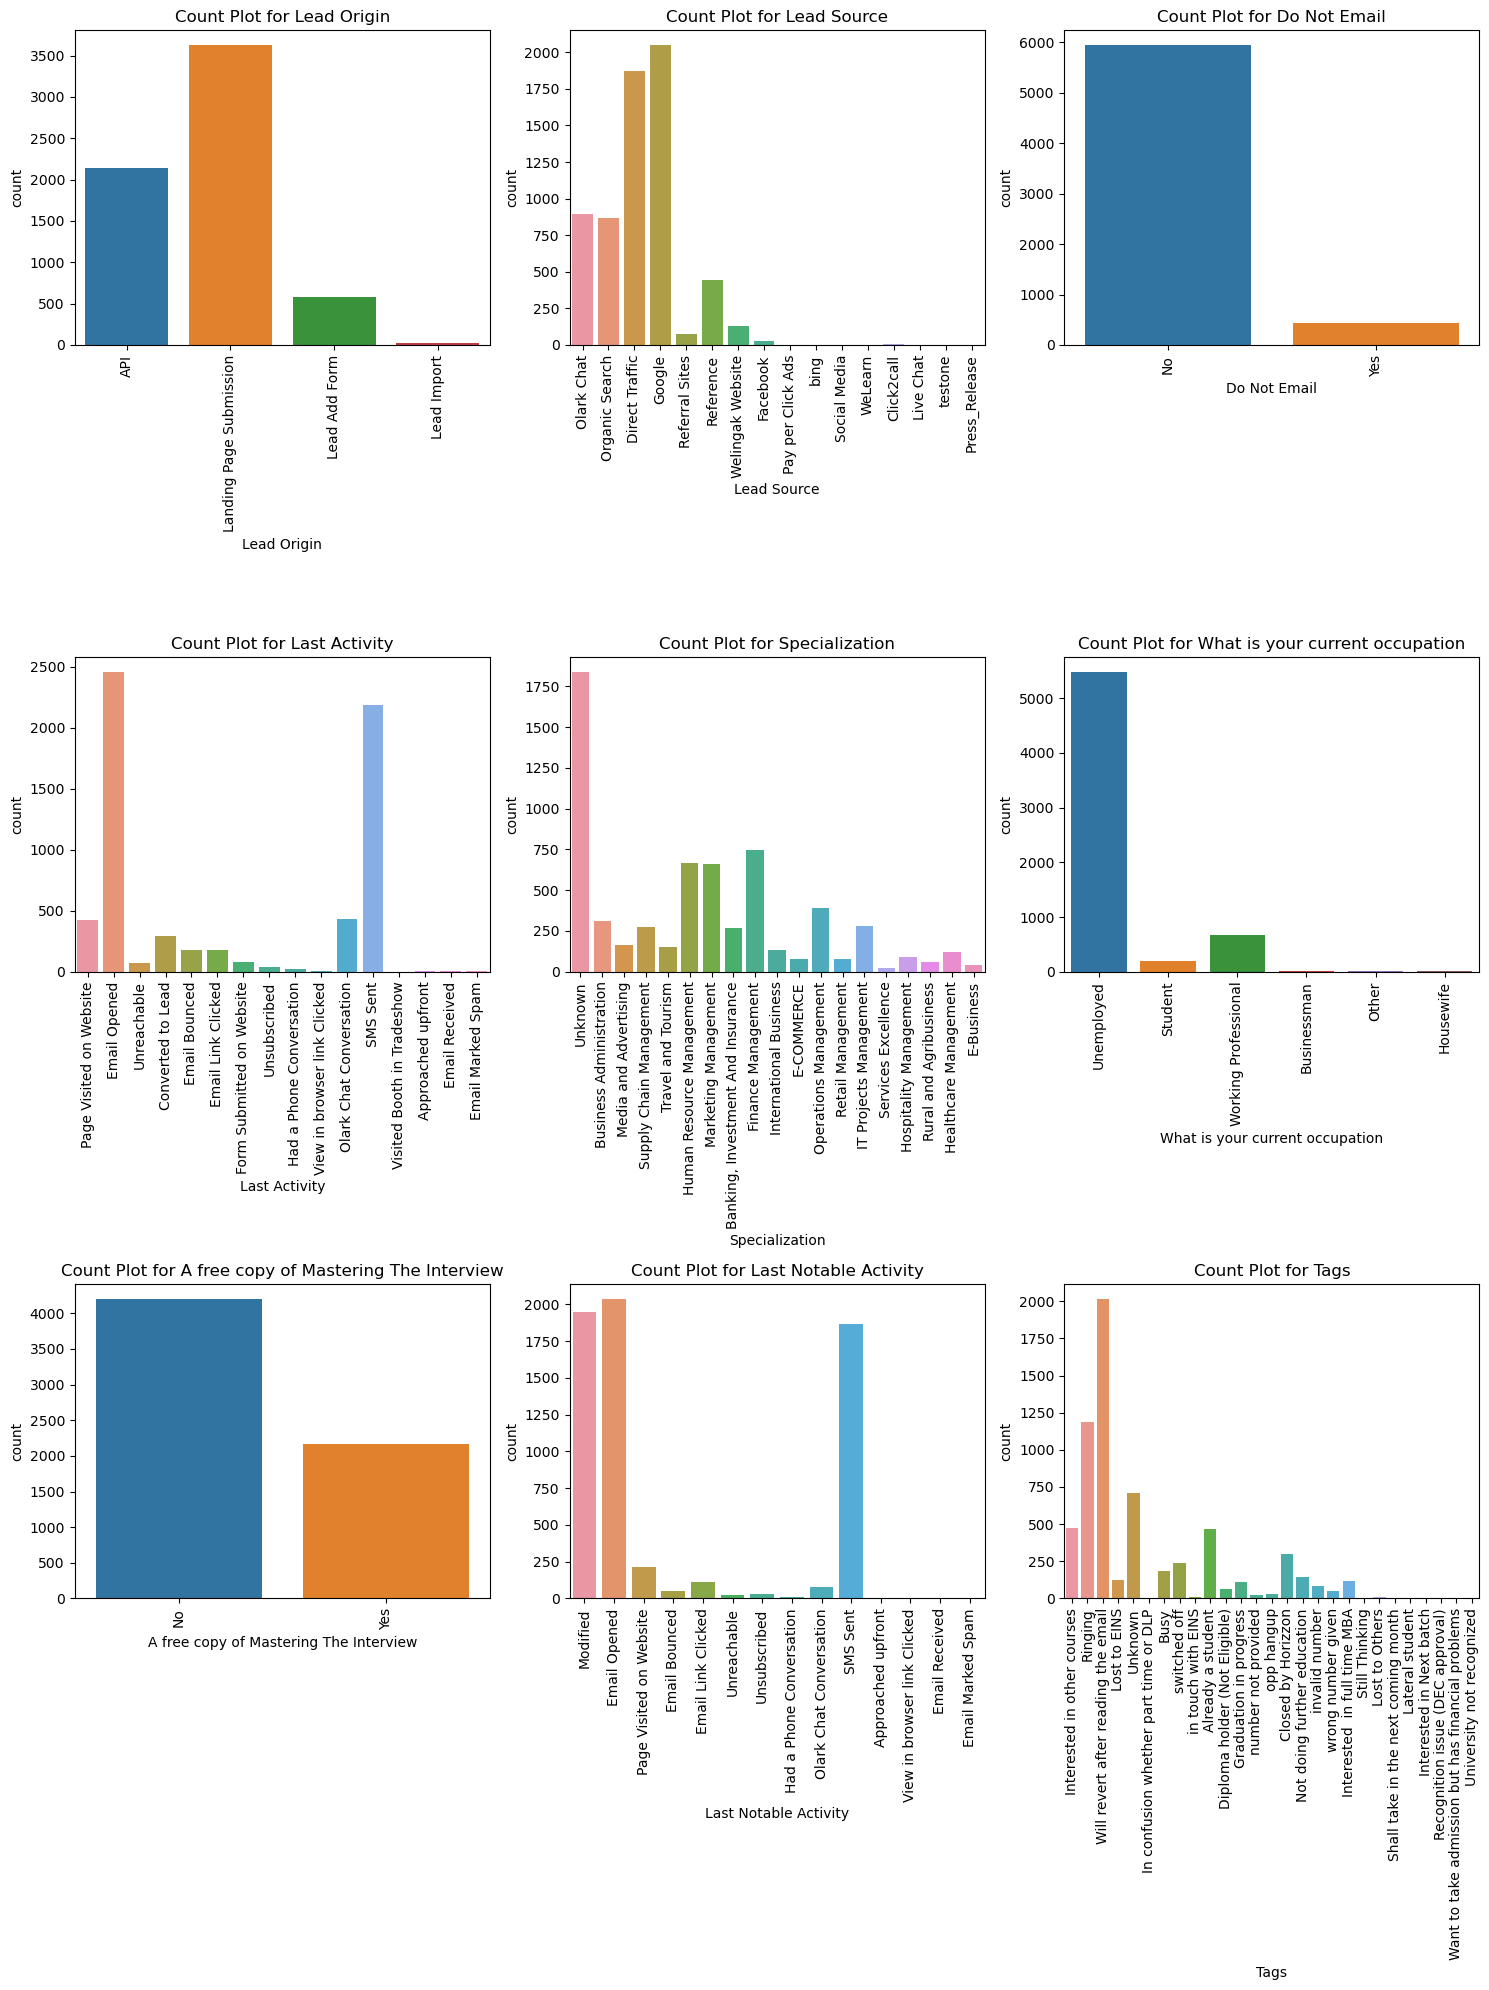

In [36]:
plt.figure(figsize=(15,20))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=lead_score, x=col)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- Most leads originate from 'Landing Page Submission,' while the fewest come from 'Lead Import.' This suggests that the landing page is the primary source of lead generation.
- The majority of leads come from direct traffic or Google searches.
- Email is the preferred contact method for most customers.
- The most common last activities for leads are 'Email Opened' or 'SMS Sent.' The least common activities are visiting the - company's stall at a Trade Show, being approached directly, or having an email marked as spam.
- Many customers did not specify their specialization or industry domain. Among those who did, the highest numbers are from Finance Management, HRM, or Marketing.
- Most leads are from customers who are currently unemployed.
- Most customers do not want a free copy of 'Mastering the Interview.'
- The majority of leads are from customers who confirmed they will respond after reading the email. The fewest leads come from those who have not decided, opted for competitors' courses, are students, confirmed they will opt next month, or have issues with university approval or recognition.

#### Bivariate Analysis of Numerical Columns

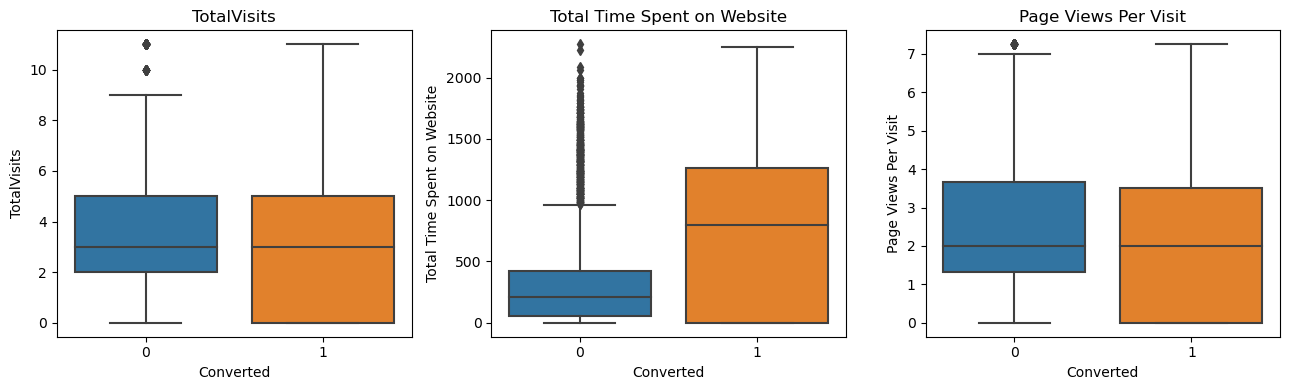

In [37]:
plt.figure(figsize=(13,4))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(x=target_cols, y=lead_score[col], data=lead_score)
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

Converted customers (Those who paid for the online courses) have significantly higher total visits, total time spent on website, and page views per visit compared to non-converted customers.

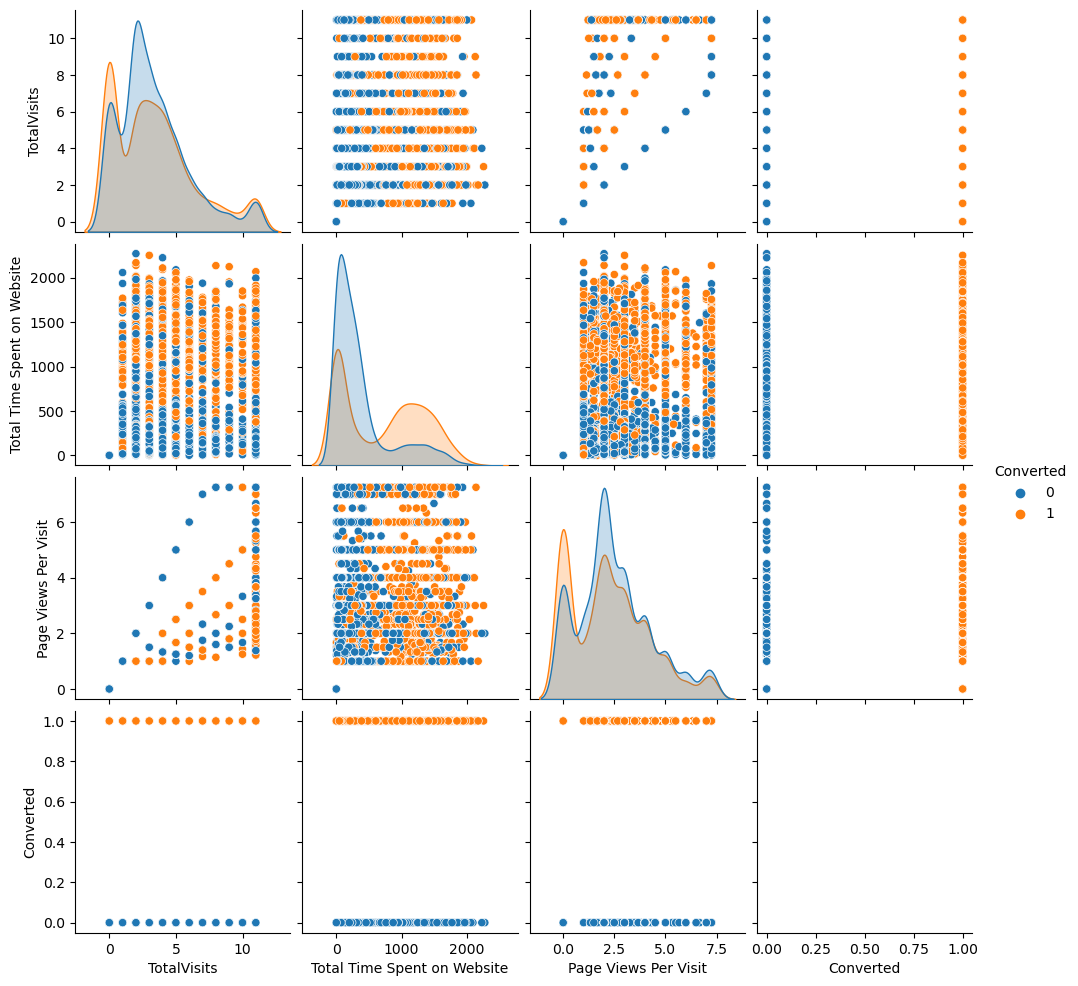

In [38]:
# Pairplot of all the numerical columns and target variable
pairplot_cols = numerical_cols + [target_cols]
sns.pairplot(data=lead_score, vars=pairplot_cols, hue=target_cols)
plt.show()

The total no. of visit and pages views per visit shows a positive correlation

#### Bivariate Analysis of Categorical Columns

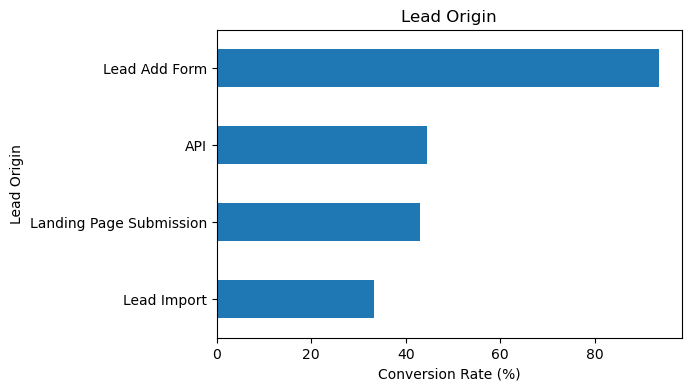

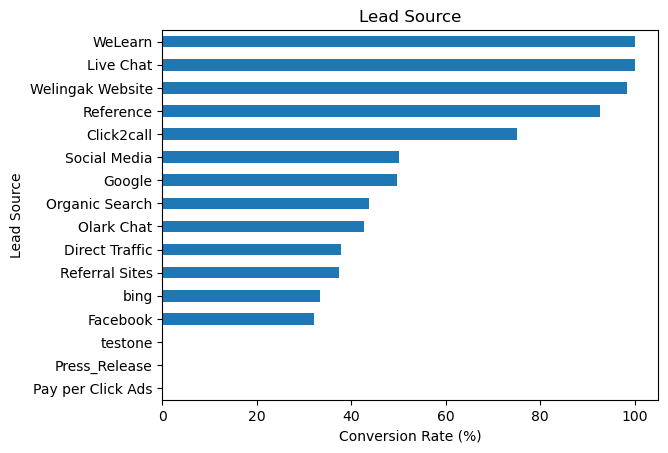

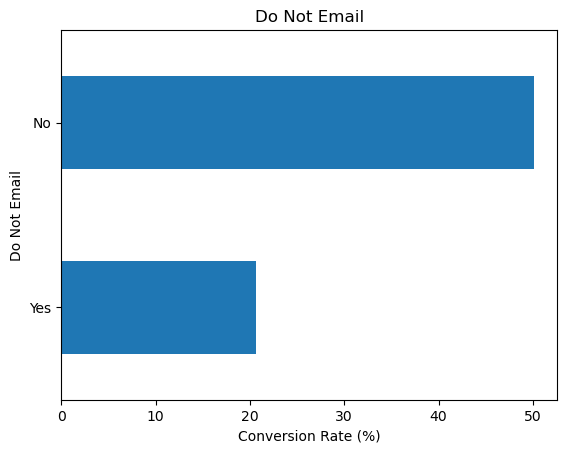

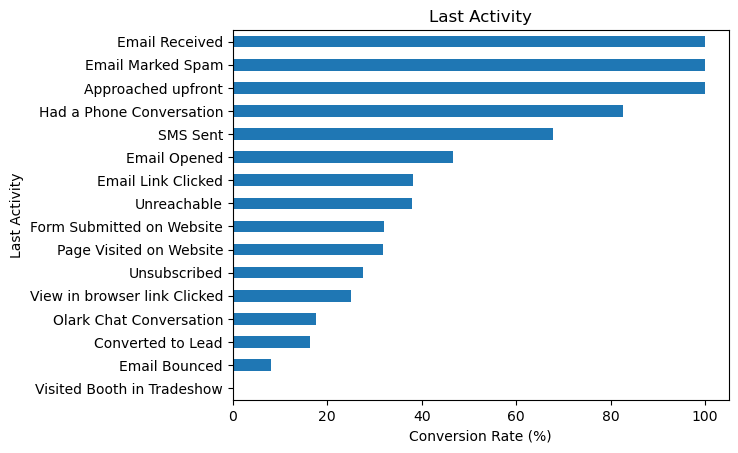

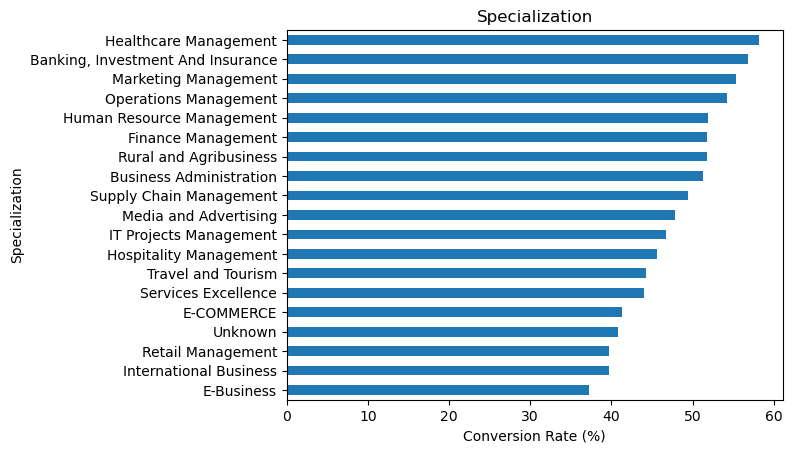

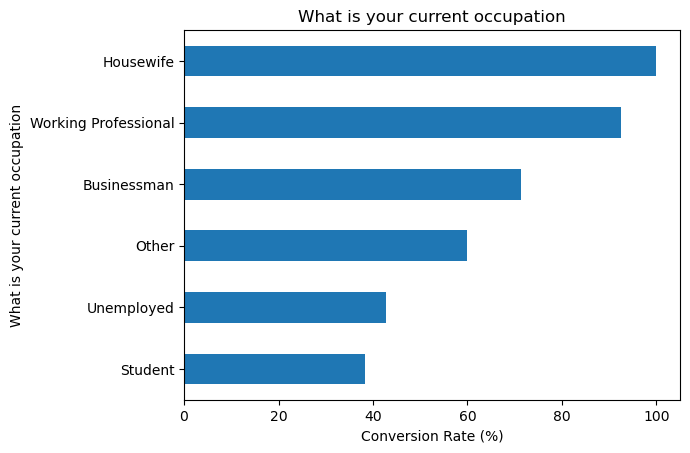

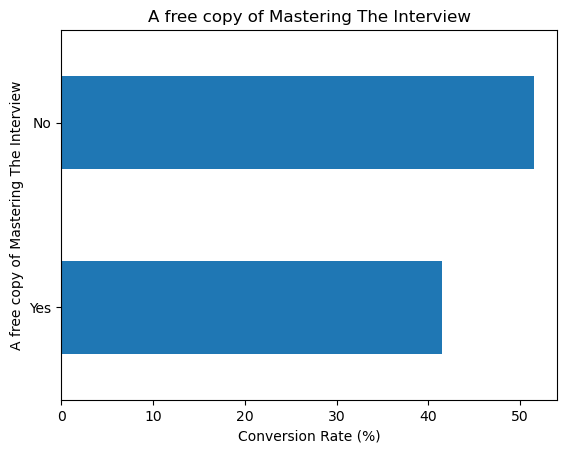

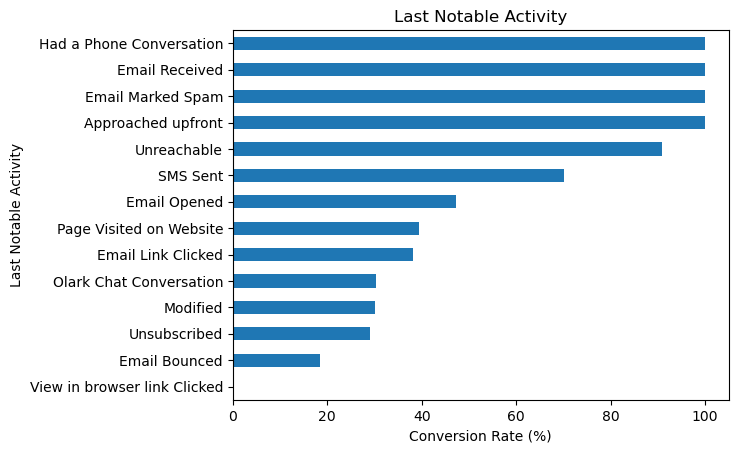

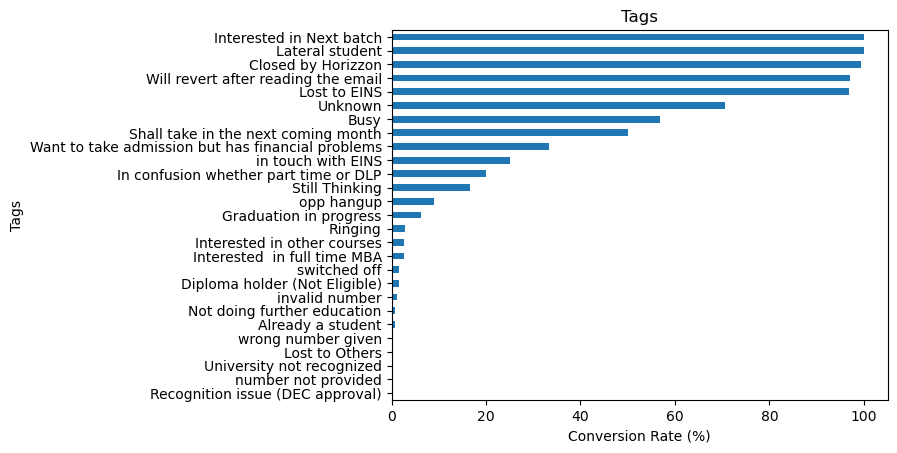

In [39]:
plt.figure(figsize=(6,4))

for col in categorical_cols:
   
    sorted_data = 100 * lead_score.groupby(col)[target_cols].mean().sort_values()
    
    sorted_data.plot.barh()
    plt.title(f'{col}')
    plt.xlabel('Conversion Rate (%)')
    plt.ylabel(col)
    plt.show()

- Most lead conversions come from the 'Lead Add Form', likely because it's a direct and convenient entry point for potential customers.
- Lead conversions are highest from Live Chat, WeLearn, and the Welingak Website, suggesting these platforms are effective at engaging and converting visitors, while Press Releases, Pay Per Click Ads, and testone yield the fewest conversions, possibly due to lower engagement or visibility.
- Customers who opt to be contacted via email show the highest conversion rates, indicating they are genuinely interested in learning more about the courses.
- The most leads are from customers whose last activity was 'Email Received', 'Email Marked Spam', or 'Approached Upfront', suggesting these interactions maintain customer engagement, whereas visiting the X Education booth at a tradeshow or having emails bounce results in fewer leads, likely due to lack of follow-up or incorrect contact details.
- Specializations in 'Healthcare Management', 'Banking', and 'Marketing Management' generate the most leads, probably because these fields have a higher demand for professional development, while E-Business has the fewest, possibly due to less interest or market saturation.
- Lead conversion rates are highest among 'Housewives' and 'Working Professionals', who may have more motivation or resources to invest in courses, while 'Unemployed' individuals and 'Students' show the lowest rates, possibly due to financial constraints or different priorities.
- The highest number of leads come from customers whose notable recent activities include 'Had a Phone Conversation', 'Email Received', 'Email Marked Spam', and 'Approached Upfront', indicating these touchpoints are critical for maintaining interest and engagement.
- Lead conversion rates are highest for customers interested in the next batch and lateral students.

### Data Imbalance

In [40]:
# Imbalance Ratio
converted_0 = lead_score.loc[lead_score['Converted'] == 0]
converted_1 = lead_score.loc[lead_score['Converted'] == 1]

round(len(converted_0)/len(converted_1),2)

1.08

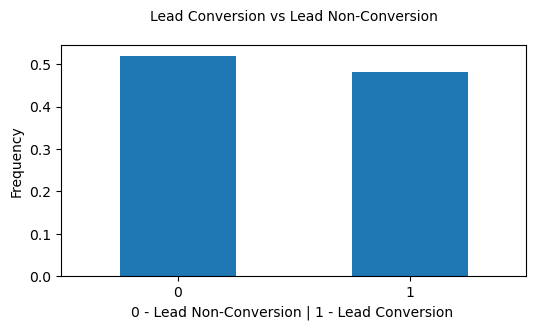

In [41]:
plt.figure(figsize=[6,3])
lead_score['Converted'].value_counts(normalize=True).plot.bar()

plt.title('Lead Conversion vs Lead Non-Conversion\n', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('0 - Lead Non-Conversion | 1 - Lead Conversion ', fontsize=10)
plt.xticks(fontsize=10, rotation = None)
plt.yticks(fontsize = 10)
plt.show()

- The dataset exhibits a data imbalance ratio of 1.08, indicating a relatively balanced distribution between converted and non-converted leads. This ratio reveals that the lead non-conversion rate is slightly higher than the conversion rate. Specifically, for every 1.08 non-converted leads, there is 1 converted lead.

- Such a minor imbalance suggests that both classes (converted and non-converted leads) are almost equally represented in the data. This balance is beneficial for predictive modeling, as it minimizes the risk of the model becoming biased toward the more frequent class

## STEP 4: DATA PREPROCESSING

In [42]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6373 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  Tags                                    6373 non-null   object 
 

### Dummy Variable Creation
#### Creating dummy variables for all the categorical columns

We will exclude the Specialization column from the initial list of categorical variables. This column will be handled separately to create dummy variables, avoiding issues with the 'Unknown' category. 

If Specialization is converted to dummy variables with drop_first=True, other important category might be dropped unintentionally. To prevent this, we’ll first create dummy variables for Specialization, then drop the 'Unknown' dummy column. Finally, we’ll merge these dummy variables back into the DataFrame and drop the original Specialization column.

In [43]:
categorical_columns = ['Lead Origin', 'Lead Source', 'Last Activity', 
                               'What is your current occupation',
                               'Last Notable Activity', 'Do Not Email','A free copy of Mastering The Interview']
lead_score[categorical_columns] = lead_score[categorical_columns].astype(str)
# Create dummy variables
dummy = pd.get_dummies(lead_score[categorical_columns], drop_first=True)

dummy = dummy.astype(int)
# Concatenating the dummy variables to the master dataframe
lead_score = pd.concat([lead_score, dummy], axis=1)

lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,A free copy of Mastering The Interview_Yes
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,No,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,No,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,Will revert after reading the email,No,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [44]:
lead_score.shape

(6373, 66)

In [45]:
lead_score = lead_score.drop(lead_score[categorical_columns], axis=1)

###### 

In [46]:
lead_score.shape

(6373, 59)

In [47]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6373 entries, 0 to 9239
Data columns (total 59 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6373 non-null   int64  
 1   TotalVisits                                           6373 non-null   float64
 2   Total Time Spent on Website                           6373 non-null   int64  
 3   Page Views Per Visit                                  6373 non-null   float64
 4   Specialization                                        6373 non-null   object 
 5   Tags                                                  6373 non-null   object 
 6   Lead Origin_Landing Page Submission                   6373 non-null   int32  
 7   Lead Origin_Lead Add Form                             6373 non-null   int32  
 8   Lead Origin_Lead Import                               6373 non-

#### Creation of dummy variable for Specialization columns and drop the 'Unknown' category

In [48]:
#Generate dummy variables for 'Specialization'
dummy_specialization = pd.get_dummies(data=lead_score['Specialization'], prefix='Specialization')

#Drop the original 'Specialization' column from lead_score
lead_score = lead_score.drop(['Specialization'], axis=1)

#Drop the 'Specialization_Unknown' column if it exists in dummy_specialization
if 'Specialization_Unknown' in dummy_specialization.columns:
    dummy_specialization = dummy_specialization.drop(['Specialization_Unknown'], axis=1)

dummy_specialization = dummy_specialization.astype(int)
#Concatenate the dummy variables to the master dataframe
lead_score = pd.concat([lead_score, dummy_specialization], axis=1)

lead_score.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Tags,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,A free copy of Mastering The Interview_Yes,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,Interested in other courses,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,Ringing,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,Will revert after reading the email,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,Ringing,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,Will revert after reading the email,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Creation of dummy variable for Tags columns and drop the 'Unknown' category

In [49]:
#Generate dummy variables for 'Tags'
dummy_tags = pd.get_dummies(data=lead_score['Tags'], prefix='Tags')

#Drop the original 'Tags' column from lead_score
lead_score = lead_score.drop(['Tags'], axis=1)

#Drop the 'Tags_Unknown' column if it exists in dummy_specialization
if 'Tags_Unknown' in dummy_tags.columns:
    dummy_tags = dummy_tags.drop(['Tags_Unknown'], axis=1)

dummy_tags = dummy_tags.astype(int)

#Concatenate the dummy variables to the master dataframe
lead_score = pd.concat([lead_score, dummy_tags], axis=1)

lead_score.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,...,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,A free copy of Mastering The Interview_Yes,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0

In [50]:
lead_score.shape

(6373, 101)

### 4.1 Splitting the data into train set and test set

In [51]:
from sklearn.model_selection import train_test_split

X = lead_score.drop(['Converted'], axis=1)
X.shape

(6373, 100)

In [52]:
y = lead_score['Converted']
y.shape

(6373,)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the results
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4461, 100)
(1912, 100)
(4461,)
(1912,)


### 4.2 Scaling of Features
Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [55]:
# Scaling the three numerical features present in the train dataset
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,A free copy of Mastering The Interview_Yes,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
7656,0.545455,0.154930,0.827586,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8843,0.272727,0.752201,0.413793,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8720,1.000000,0.091109,0.448276,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4979,0.363636,0.378961,0.551724,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [56]:
# Scaling the three numerical features present in the test dataset
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,A free copy of Mastering The Interview_Yes,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
2828,0.454545,0.303684,0.689655,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6562,0.272727,0.014376,0.413793,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7468,0.454545,0.549865,0.689655,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6337,0.181818,0.215633,0.275862,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

## STEP 5: TRAINING THE MODEL

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Feature Selection uisng RFE
Select only top 15 features

In [58]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator = logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [59]:
# Features that have been selected and eliminated by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', False, 8),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Source_Direct Traffic', False, 41),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 43),
 ('Lead Source_Live Chat', False, 84),
 ('Lead Source_Olark Chat', False, 9),
 ('Lead Source_Organic Search', False, 42),
 ('Lead Source_Pay per Click Ads', False, 83),
 ('Lead Source_Press_Release', False, 85),
 ('Lead Source_Reference', False, 47),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_Social Media', False, 62),
 ('Lead Source_WeLearn', False, 86),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 51),
 ('Lead Source_testone', False, 71),
 ('Last Activity_Converted to Lead', False, 45),
 ('Last Activity_Email Bounced', False, 60),
 ('Last Activity_Email Link Clicked', False, 66),
 ('

#### Here are the list of features selected by RFE for model building

In [60]:
selected_features = X_train.columns[rfe.support_]
print(selected_features)
print("\nNumber of features selected by RFE:", len(selected_features))

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given'],
      dtype='object')

Number of features selected by RFE: 15


In [61]:
non_selected_features = X_train.columns[~rfe.support_]
print("\nNumber of features eliminated by RFE:", len(non_selected_features))


Number of features eliminated by RFE: 85


Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [62]:
import statsmodels.api as sm

In [63]:
# Stroing the features selected through rfe into X_train_rfe dstaframe
X_train_rfe = X_train[selected_features]
X_train_rfe.head()

,Total Time Spent on Website,Lead Source_Welingak Website,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given
7656,0.154930,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8843,0.752201,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8720,0.091109,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4979,0.378961,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1400,0.705546,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Correlation Matrix

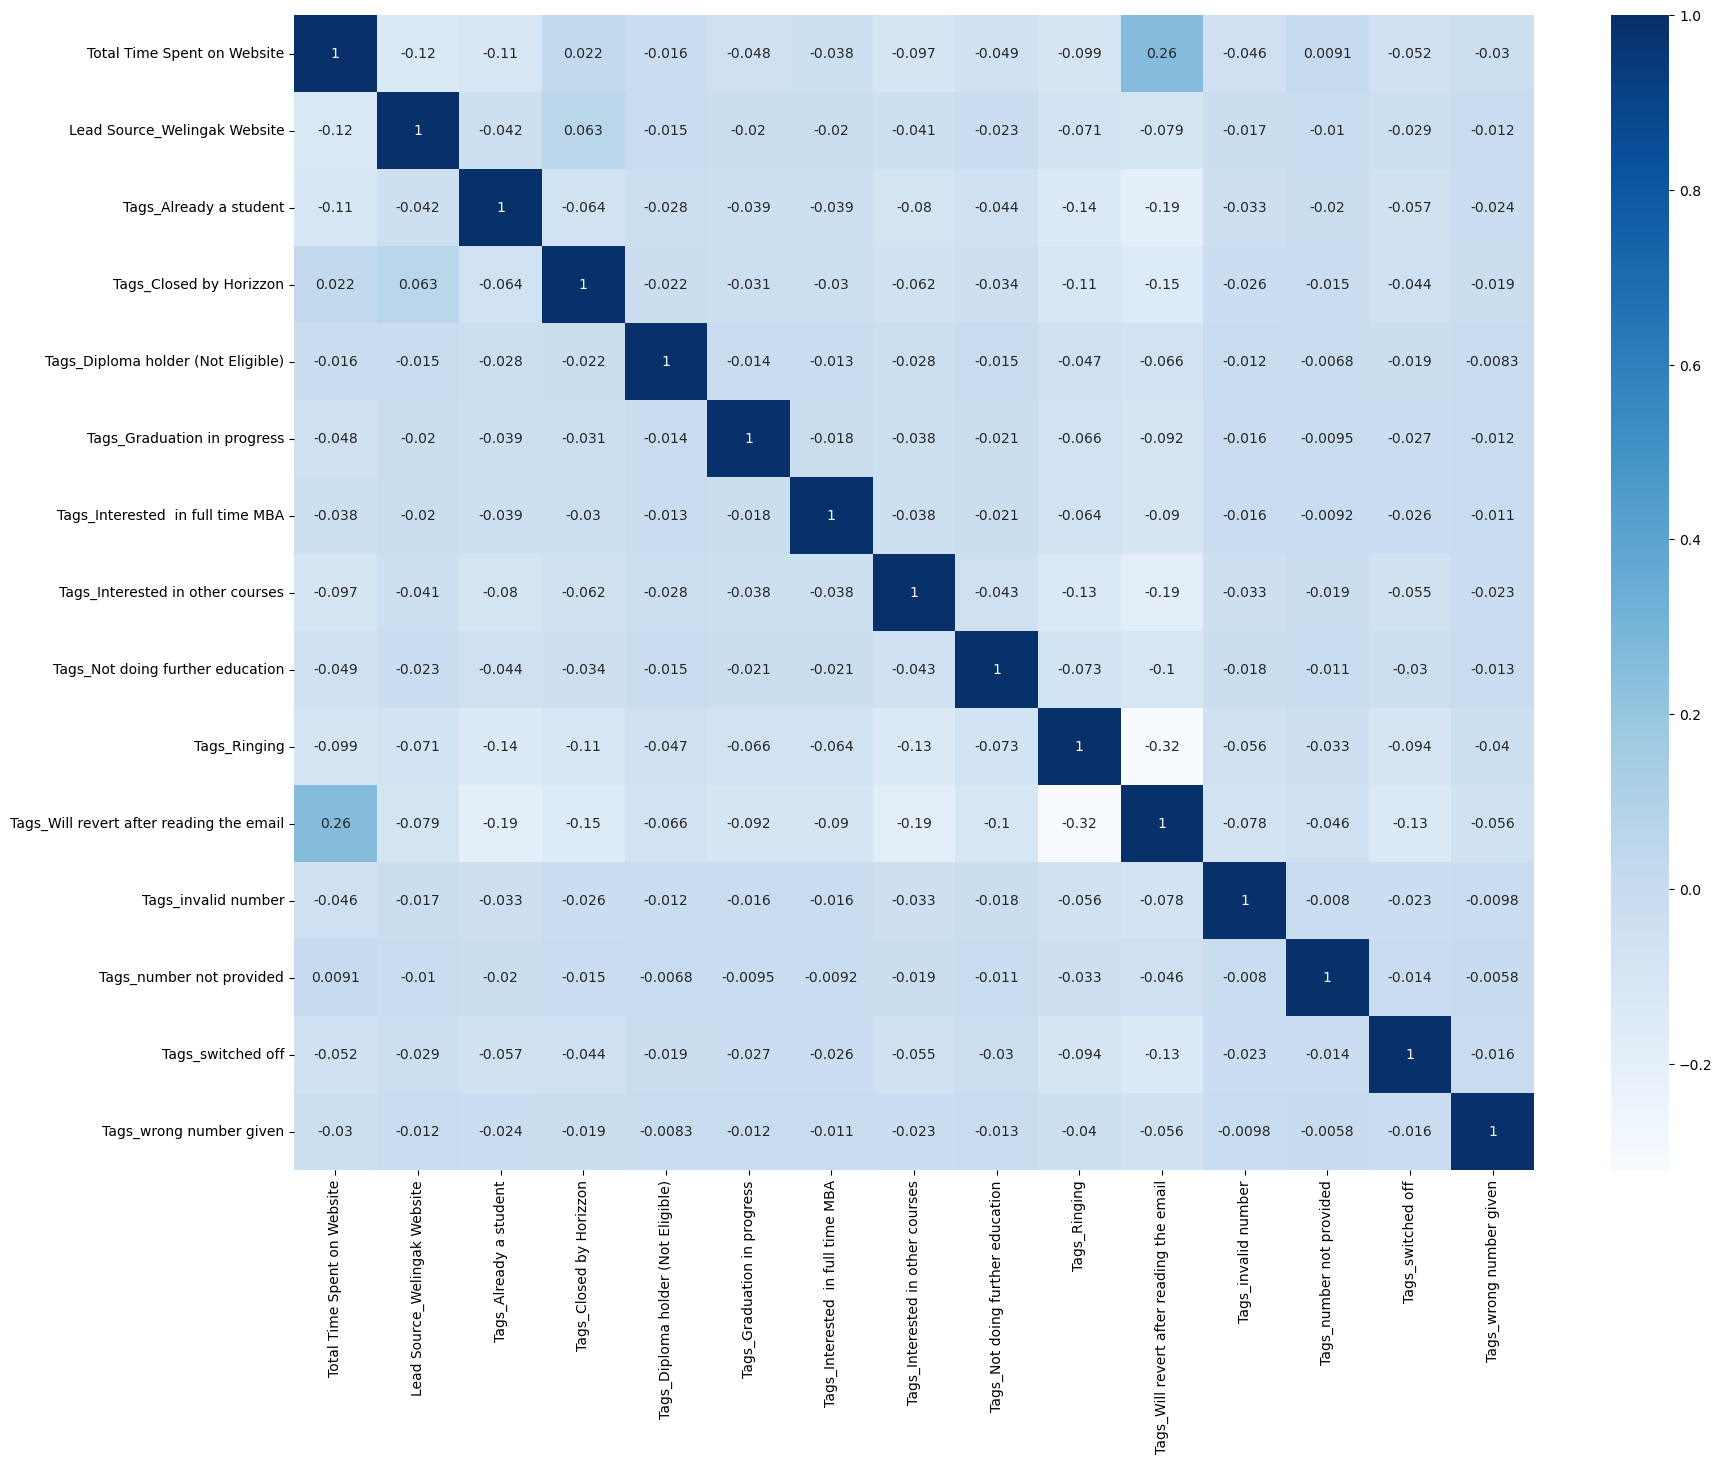

In [64]:
plt.figure(figsize=(20,15))
sns.heatmap(data=X_train_rfe.corr(), cmap='Blues', annot=True)
plt.show()

#### Model 1

In [65]:
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -814.86
Date:                Mon, 29 Jul 2024   Deviance:                       1629.7
Time:                        23:30:15   Pearson chi2:                 4.08e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6391
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0516      0.100     -0.517      0.605      -0.247       0.144
Total Time Spent on Website                  2.8786      0.276     10.416      0.000       2.337       3.420
Lead Source_Welingak Website                 3.6475      0.723      5.042      0.000       2.230       5.065
Tags_Already a student                      -5.6891      0.716     -7.944      0.000      -7.093      -4.285
Tags_Closed by Horizzon                      4.1009      0.717      5.717      0.000       2.695       5.507
Tags_Diploma holder (Not Eligible)         -25.2808   1.93e+04     -0.001      0.999   -3.78e+04    3.77e+04
Tags_Graduation in progress                 -3.3104      0.480     -6.893      0.000      -4.252      -2.369
Tags_Interested  in full time MBA           -4.2665      0.728     -5.862      0.000      -5.693      -2.840
Tags_Interested in other courses            -4.2525      0.372    -11.426      0.000      -4.982      -3.523
Tags_Not doing further education            -5.1909      1.012     -5.130      0.000      -7.174      -3.208
Tags_Ringing                                -4.2566      0.233    -18.284      0.000      -4.713      -3.800
Tags_Will revert after reading the email     2.7905      0.177     15.760      0.000       2.443       3.138
Tags_invalid number                         -4.6146      1.023     -4.512      0.000      -6.619      -2.610
Tags_number not provided                   -25.4967   2.76e+04     -0.001      0.999   -5.41e+04     5.4e+04
Tags_switched off                           -5.0482      0.720     -7.009      0.000      -6.460      -3.637
Tags_wrong number given                    -25.0568    2.3e+04     -0.001      0.999   -4.52e+04    4.51e+04
============================================================================================================
"""

There are quite a few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### VIF > 5: High correlation. Indicates problematic multicollinearity that may require attention.

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.75
10,Tags_Will revert after reading the email,1.51
9,Tags_Ringing,1.09
3,Tags_Closed by Horizzon,1.06
2,Tags_Already a student,1.02
7,Tags_Interested in other courses,1.02
13,Tags_switched off,1.02
1,Lead Source_Welingak Website,1.01
4,Tags_Diploma holder (Not Eligible),1.01
5,Tags_Graduation in progress,1.01


VIF seems good for all the features, We can drop the column 'Tags_Diploma holder (Not Eligible)' as it has p-value > 0.05

In [68]:
X_train_rfe.drop(['Tags_Diploma holder (Not Eligible)'], axis = 1, inplace = True)
print(X_train_rfe.columns)
print(X_train_rfe.shape)

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Graduation in progress', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Not doing further education',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given'],
      dtype='object')
(4461, 14)


#### Model 2

In [69]:
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -856.66
Date:                Mon, 29 Jul 2024   Deviance:                       1713.3
Time:                        23:30:15   Pearson chi2:                 4.10e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6322
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.2032      0.097     -2.103      0.035      -0.393      -0.014
Total Time Spent on Website                  2.8044      0.265     10.569      0.000       2.284       3.324
Lead Source_Welingak Website                 3.7984      0.723      5.254      0.000       2.381       5.215
Tags_Already a student                      -5.5153      0.715     -7.709      0.000      -6.918      -4.113
Tags_Closed by Horizzon                      4.2604      0.717      5.943      0.000       2.855       5.665
Tags_Graduation in progress                 -3.1377      0.479     -6.556      0.000      -4.076      -2.200
Tags_Interested  in full time MBA           -4.0921      0.727     -5.631      0.000      -5.517      -2.668
Tags_Interested in other courses            -4.0785      0.371    -11.003      0.000      -4.805      -3.352
Tags_Not doing further education            -5.0177      1.011     -4.962      0.000      -7.000      -3.036
Tags_Ringing                                -4.0794      0.230    -17.709      0.000      -4.531      -3.628
Tags_Will revert after reading the email     2.9544      0.175     16.861      0.000       2.611       3.298
Tags_invalid number                         -4.4410      1.021     -4.348      0.000      -6.443      -2.439
Tags_number not provided                   -25.3133   2.76e+04     -0.001      0.999   -5.41e+04    5.41e+04
Tags_switched off                           -4.8728      0.719     -6.774      0.000      -6.283      -3.463
Tags_wrong number given                    -24.8872   2.31e+04     -0.001      0.999   -4.52e+04    4.52e+04
============================================================================================================
"""

In [70]:
# Checking VIF for Model 2
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.74
9,Tags_Will revert after reading the email,1.50
8,Tags_Ringing,1.09
3,Tags_Closed by Horizzon,1.06
2,Tags_Already a student,1.02
6,Tags_Interested in other courses,1.02
12,Tags_switched off,1.02
1,Lead Source_Welingak Website,1.01
4,Tags_Graduation in progress,1.01
5,Tags_Interested in full time MBA,1.01


We can drop the column 'Tags_number not provided' as the p-value is very high

In [71]:
X_train_rfe.drop(['Tags_number not provided'], axis = 1, inplace = True)
print(X_train_rfe.columns)
print(X_train_rfe.shape)

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Graduation in progress', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Not doing further education',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given'],
      dtype='object')
(4461, 13)


#### Model 3

In [72]:
X_train_sm = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -878.21
Date:                Mon, 29 Jul 2024   Deviance:                       1756.4
Time:                        23:30:16   Pearson chi2:                 4.09e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6287
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.2611      0.096     -2.732      0.006      -0.448      -0.074
Total Time Spent on Website                  2.7092      0.259     10.442      0.000       2.201       3.218
Lead Source_Welingak Website                 3.8563      0.723      5.335      0.000       2.440       5.273
Tags_Already a student                      -5.4296      0.715     -7.594      0.000      -6.831      -4.028
Tags_Closed by Horizzon                      4.3291      0.717      6.041      0.000       2.925       5.734
Tags_Graduation in progress                 -3.0531      0.477     -6.397      0.000      -3.988      -2.118
Tags_Interested  in full time MBA           -4.0054      0.726     -5.518      0.000      -5.428      -2.583
Tags_Interested in other courses            -3.9924      0.370    -10.798      0.000      -4.717      -3.268
Tags_Not doing further education            -4.9326      1.011     -4.880      0.000      -6.914      -2.952
Tags_Ringing                                -3.9892      0.229    -17.423      0.000      -4.438      -3.540
Tags_Will revert after reading the email     3.0285      0.174     17.366      0.000       2.687       3.370
Tags_invalid number                         -4.3556      1.020     -4.270      0.000      -6.355      -2.356
Tags_switched off                           -4.7849      0.719     -6.658      0.000      -6.193      -3.376
Tags_wrong number given                    -23.8067    1.4e+04     -0.002      0.999   -2.75e+04    2.74e+04
============================================================================================================
"""

In [73]:
# Checking VIF for Model3
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.73
9,Tags_Will revert after reading the email,1.50
8,Tags_Ringing,1.09
3,Tags_Closed by Horizzon,1.06
2,Tags_Already a student,1.02
6,Tags_Interested in other courses,1.02
11,Tags_switched off,1.02
1,Lead Source_Welingak Website,1.01
4,Tags_Graduation in progress,1.01
5,Tags_Interested in full time MBA,1.01


We can drop the column 'Tags_wrong number given' as the p-value is very high

In [74]:
X_train_rfe.drop(['Tags_wrong number given'], axis = 1, inplace = True)
print(X_train_rfe.columns)
print(X_train_rfe.shape)

Index(['Total Time Spent on Website', 'Lead Source_Welingak Website',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Graduation in progress', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Not doing further education',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off'],
      dtype='object')
(4461, 12)


#### Model 4

In [75]:
X_train_sm = sm.add_constant(X_train_rfe)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -901.91
Date:                Mon, 29 Jul 2024   Deviance:                       1803.8
Time:                        23:30:16   Pearson chi2:                 4.13e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6247
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3626      0.094     -3.868      0.000      -0.546      -0.179
Total Time Spent on Website                  2.7472      0.255     10.754      0.000       2.247       3.248
Lead Source_Welingak Website                 3.9572      0.723      5.476      0.000       2.541       5.374
Tags_Already a student                      -5.3391      0.715     -7.469      0.000      -6.740      -3.938
Tags_Closed by Horizzon                      4.4261      0.716      6.178      0.000       3.022       5.830
Tags_Graduation in progress                 -2.9621      0.477     -6.206      0.000      -3.898      -2.027
Tags_Interested  in full time MBA           -3.9152      0.726     -5.394      0.000      -5.338      -2.492
Tags_Interested in other courses            -3.9020      0.369    -10.562      0.000      -4.626      -3.178
Tags_Not doing further education            -4.8418      1.011     -4.791      0.000      -6.823      -2.861
Tags_Ringing                                -3.9004      0.228    -17.083      0.000      -4.348      -3.453
Tags_Will revert after reading the email     3.1235      0.174     17.993      0.000       2.783       3.464
Tags_invalid number                         -4.2650      1.020     -4.180      0.000      -6.265      -2.265
Tags_switched off                           -4.6952      0.719     -6.534      0.000      -6.104      -3.287
============================================================================================================
"""

### Correlation Matrix
Building a correlation matrix after finalizing your logistic regression model for re-verifying the final model. Even if the initial checks (p-values and VIFs) look good, the correlation matrix helps us spot any strong relationships between predictors that might cause problems later.

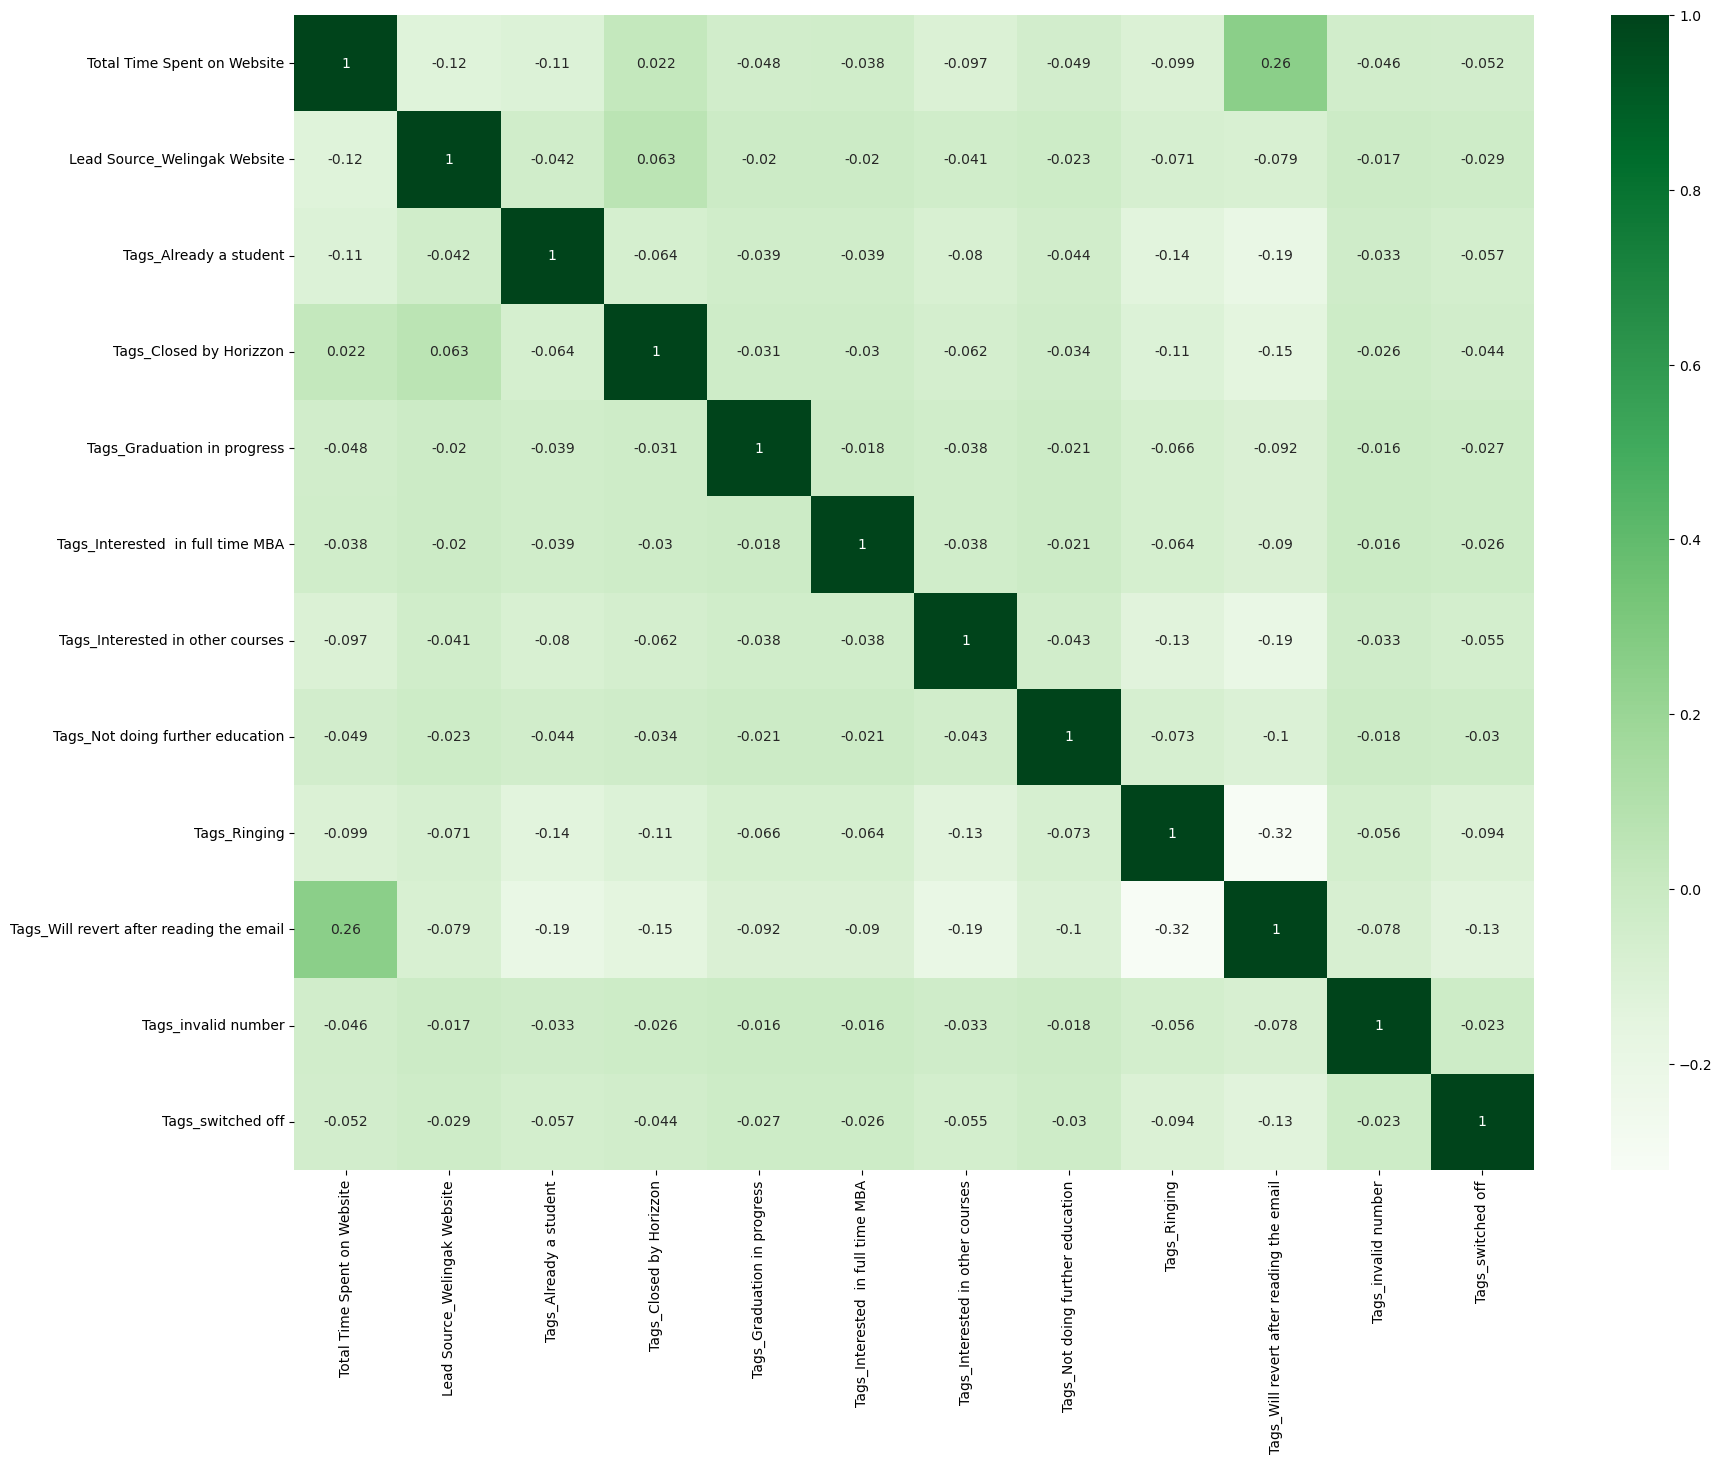

In [76]:
plt.figure(figsize=(20,15))
sns.heatmap(data=X_train_rfe.corr(), cmap='Greens', annot=True)
plt.show()

#### The p-value of all the features are below 0.05 indicating that they are statistically significant.
#### The VIF values of all the features are below 5, indicating that the model does not seem to suffer from multicollinearity.
#### We are good to consider this as the final model

## STEP 6: EVALUATING THE MODEL
Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [77]:
X_train = X_train_rfe

In [78]:
y_train_pred = logm4.predict(sm.add_constant(X_train))
y_train_pred[:10]

7656    0.021094
8843    0.846033
8720    0.017735
4979    0.663392
1400    0.089090
1887    0.884929
6449    0.963426
6031    0.773576
124     0.092585
5844    0.018603
dtype: float64

In [79]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0210938 , 0.8460325 , 0.01773452, 0.66339226, 0.08909001,
       0.88492949, 0.96342572, 0.77357628, 0.09258471, 0.01860349])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [80]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.021094
1,0,0.846033
2,0,0.017735
3,1,0.663392
4,0,0.089090


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [81]:
y_train_pred_final =  pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})

y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.021094,0
1,0,0.846033,1
2,0,0.017735,0
3,1,0.663392,1
4,0,0.089090,0


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [82]:
# Importing the metrics from sklear for model evaluation
from sklearn import metrics

#### Confusion Matrix

In [83]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2158  171]
 [ 217 1915]]


#### Overall Accuracy of the model

In [84]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9130239856534409


In [85]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity & Specificity

In [86]:
print("Sensitivity: ", round((TP / float(TP+FN)),2))
print("Specificity: ", round((TN/(TN+FP)),2))

Sensitivity:  0.9
Specificity:  0.93


### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

#### Plotting the ROC Curve to find the optimal cutoff value

In [87]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [88]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

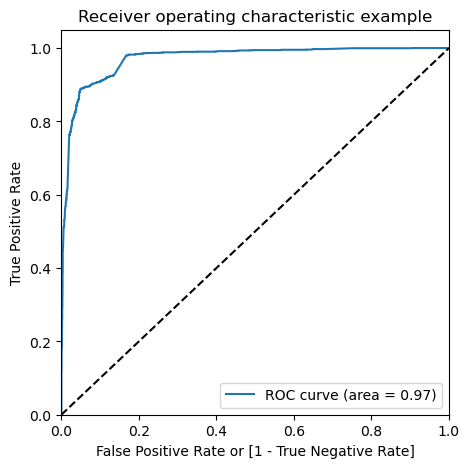

In [89]:
# Calling the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.97 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [90]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.021094,0,1,0,0,0,0,0,0,0,0,0
1,0,0.846033,1,1,1,1,1,1,1,1,1,1,0
2,0,0.017735,0,1,0,0,0,0,0,0,0,0,0
3,1,0.663392,1,1,1,1,1,1,1,1,0,0,0
4,0,0.089090,0,1,0,0,0,0,0,0,0,0,0


In [91]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.477920  1.000000  0.000000
0.1   0.1  0.898453  0.982176  0.821812
0.2   0.2  0.902712  0.979831  0.832117
0.3   0.3  0.902937  0.979362  0.832976
0.4   0.4  0.902937  0.979362  0.832976
0.5   0.5  0.913024  0.898218  0.926578
0.6   0.6  0.919076  0.883677  0.951481
0.7   0.7  0.908541  0.855535  0.957063
0.8   0.8  0.890159  0.800188  0.972520
0.9   0.9  0.875813  0.762195  0.979820


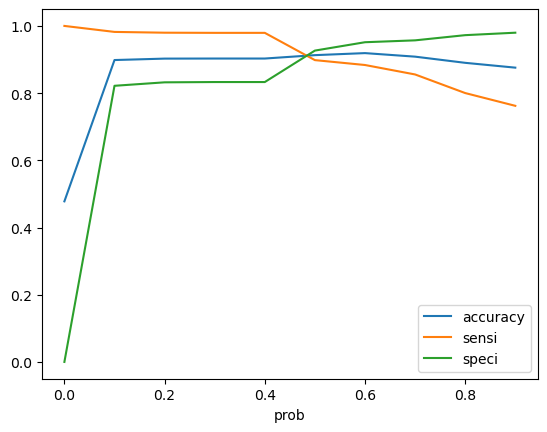

In [92]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.48, you get the optimal values of the three metrics. So let's choose 0.48 as our cutoff now.

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.48 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.021094,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.846033,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.017735,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.663392,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.089090,0,1,0,0,0,0,0,0,0,0,0,0


In [94]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9085406859448554

In [95]:
# Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,  y_train_pred_final.final_predicted)
confusion2

array([[2125,  204],
       [ 204, 1928]], dtype=int64)

In [96]:
# Let's evaluate the other metrics as well
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [97]:
# Calculate Sensitivity

TP/(TP+FN)

0.9043151969981238

In [98]:
# Calculate Specificity

TN/(TN+FP)

0.9124087591240876

This cutoff point seems good to go!

## STEP 6 : MAKING PREDICTIONS ON THE TEST SET

In [99]:
print(X_test.shape)
print(logm4.params.shape)

(1912, 100)
(13,)


In [100]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,A free copy of Mastering The Interview_Yes,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
2828,0.454545,0.303684,0.689655,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6562,0.272727,0.014376,0.413793,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7468,0.454545,0.549865,0.689655,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6337,0.181818,0.215633,0.275862,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [101]:
X_test.drop(columns=non_selected_features, inplace=True)

In [102]:
X_test.shape

(1912, 15)

In [103]:
X_test.drop(columns=['Tags_Diploma holder (Not Eligible)', 'Tags_number not provided',
                    'Tags_wrong number given'], inplace=True)

In [104]:
X_test.shape

(1912, 12)

In [105]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = logm4.predict(sm.add_constant(X_test))

In [106]:
y_test_pred[:10]

2828    0.973278
6562    0.014435
7468    0.027996
6337    0.017375
8566    0.973342
338     0.410321
3940    0.048472
448     0.983101
7146    0.498816
4428    0.990155
dtype: float64

In [107]:
y_test_pred.shape

(1912,)

In [108]:
#Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
2828,0.973278
6562,0.014435
7468,0.027996
6337,0.017375
8566,0.973342


In [109]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [110]:
#Putting Customer ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [111]:
#Removing index for both dataframes to append them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [112]:
#Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,2828,0.973278
1,0,6562,0.014435
2,0,7468,0.027996
3,0,6337,0.017375
4,1,8566,0.973342


In [113]:
#Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,2828,0.973278
1,0,6562,0.014435
2,0,7468,0.027996
3,0,6337,0.017375
4,1,8566,0.973342


In [114]:
#Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,2828,1,0.973278,97
1,6562,0,0.014435,1
2,7468,0,0.027996,3
3,6337,0,0.017375,2
4,8566,1,0.973342,97


In [115]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,2828,1,0.973278,97,1
1,6562,0,0.014435,1,0
2,7468,0,0.027996,3,0
3,6337,0,0.017375,2,0
4,8566,1,0.973342,97,1


Calculation of the percentage of leads that are predicted to convert out of the total number of leads

In [116]:
100*sum(y_pred_final['Converted'])/len(lead_score['Converted'])

14.639887023379885

In [117]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8964435146443515

In [118]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[861, 118],
       [ 80, 853]], dtype=int64)

In [119]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9043151969981238

In [120]:
#Let us calculate specificity
TN / float(TN+FP)

0.9124087591240876

In [121]:
#precision_score
from sklearn.metrics import precision_score
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.878475798146241

In [122]:
#recall_score
from sklearn.metrics import recall_score
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)


0.9142550911039657

In [123]:
#Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.898217636022514

In [124]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,2828,1,0.973278,97,1
4,8566,1,0.973342,97,1
7,448,1,0.983101,98,1
9,4428,1,0.990155,99,1
12,892,1,0.994444,99,1


In [125]:
hot_leads.shape

(771, 5)

So there are 771 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [126]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([2828, 8566,  448, 4428,  892, 7259, 2514, 7342, 6095, 8977, 2196,
         37,  350,  335, 6701, 3522, 1766, 1200, 4472,  780, 4123, 1552,
       4218, 6379, 1720, 1859, 6149, 5793, 8594, 4779, 7125, 4862, 8056,
       2797, 8087, 7211,  859,  841, 7094, 7045,  507, 5007, 4791, 2765,
        406, 1214, 1982, 3265, 1188, 3685, 2286, 7467, 8110, 2756, 7448,
       7849,  317, 6592, 2763, 3441, 4022,  896, 3494, 5175, 9130, 5292,
        373, 4331, 9044, 3932, 8267, 6627,  788, 7784,  891, 6269, 5363,
       8389, 1809, 5985, 3177, 1450, 4993, 4935, 1578, 3976, 3591, 6913,
        982, 3417, 4135, 4418, 3187, 5937, 5167, 5010, 5089, 3435, 4891,
       5641, 7493, 8719, 1540, 7672, 5212, 3001, 7774, 6729,  548, 7005,
       8730, 5747, 6684, 8950, 4386, 8098, 7449,  556, 2564, 8492, 5480,
       4444, 2722, 5837, 6660, 1800, 5692,  494, 2549, 6842, 3447, 2052,
       1625,  822, 5180, 5502, 4960, 4198, 5207, 3272, 8617, 8823, 2223,
       5827, 8362, 2199, 4489, 8402, 2785, 2565, 50

These are the ID of the one who can be definitly be converted and make more profits for X eduaction

## Summary : Logistic Regression Model for Lead Scoring

#### Statistical Significance:
- All independent features have a p-value of 0.00, indicating strong statistical significance.
- Pseudo R-squared (CS): 0.6247, which suggests a good fit.

#### Performance Metrics:

- ROC Curve Area: 0.97 - indicating excellent discrimination ability between potential and non-potential customers.
- Optimal Cutoff Point: 0.48, determined as the threshold for classifying leads as potential customers.

#### Evaluation on Training Set:

- Overall Accuracy: 0.91, meaning 91% of the training data is correctly classified.
- Sensitivity: 0.90, indicating that 90% of the actual potential customers are correctly identified by the model.
- Specificity: 0.90, meaning 90% of the actual non-potential customers are correctly identified.

#### Prediction on Test Set:

- Overall Accuracy: 0.89, showing the model's generalizability and ability to correctly classify 89% of the test data.
- Sensitivity: 0.90, reflecting the model's consistency in identifying 90% of potential customers in the test set.
- Specificity: 0.90, maintaining the model's ability to correctly classify 90% of non-potential customers in the test set.
- Precision: 0.87, indicating that 87% of the leads classified as potential customers are actually potential customers.
- Recall: 0.91, reaffirming the model's capability to identify 91% of actual potential customers.

#### Summary:

The logistic regression model built for lead scoring exhibits strong predictive performance with a high ROC curve area of 0.97, signifying excellent discrimination capabilities.

The model's statistical significance is confirmed by the p-values of 0.00 for all features, and the pseudo R-squared value of 0.6247 suggests a good fit to the data.

Consistent performance metrics across training and test sets—such as accuracy, sensitivity, and specificity—underscore the model's robustness and reliability.

The precision and recall scores further validate the model's effectiveness in correctly identifying and classifying potential customers.

This model provides a reliable tool for the company to prioritize outreach to hot leads, thereby improving lead conversion rates by focusing on the most promising potential customers.

### STRATEGY RECOMMENDATIONS

#### Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?



#### 2.	What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

1. Tags_Closed by Horizzon : A kind of CRM Tool used in lead generation
2. Lead Source_Welingak Website : Leads that has come from Welingak Website	
3. Tags_Will revert after reading the email : Customers who have receievd the email & cofirmed that they will revert after reading the email

#### 3. X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

Hiring MBA interns for this role so that costing can be reduced for training the interns. A minimal KT (knowledge Transfer) for the required job role can be given and KPIs/task can be assigned (cost reduction).
Providing them with the hot-leads basis of below points:

1. Segregating hot-leads via on the basis of customers’ occupation
2. Segregating hot-leads via different channels such as newspapers ad, digital marketing (SEO/SEM), social media marketing, recommendations, employee skill enhancement program in different industries.
3. Determining the customer journey from lead to conversion. We can segregate the customer profile on the basis of number of touchpoints (how valuable the course might be/effective for the individual)




#### 4.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

During the period when the company has achieved its quarterly target, the following strategies can be employed to minimize unnecessary phone calls:

1. Highlight Offerings: Focus on the benefits and potential gains that a new lead could achieve by collaborating with the company.

2. Promote Add-Ons: Inform potential leads about additional offerings, such as a complimentary course or extra services, alongside their main product.

3. Showcase Achievements: Provide evidence of past successes and positive outcomes from previous alumni or customers to build trust with new leads.

4. Share Testimonials: Offer curated testimonials from industry experts related to the company’s course offerings to address client demands and concerns.

5. Emphasize Post-Course Services: Explain the post-course support and services to reassure potential leads and reduce the risk of them turning to competitors.

